In [3]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [5]:
#Read file in df dataframe
df=pd.read_csv(r"C:\Users\user\Documents\Python\dataset\customer_churn.csv",header=0,index_col=0,delimiter=" *, *")
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocessing

In [3]:
#checking for dimension of df
df.shape

(7043, 20)

In [4]:
#Checking for Null Value in df
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Imputing Missing values

In [5]:
#After checking for Null value in df we find that "TotalCharges" having Null Value
df["TotalCharges"].fillna(round(df["TotalCharges"].mean()),inplace=True)

In [6]:
#Validating for imputed Missing values...
df["TotalCharges"].isnull().sum()

0

In [7]:
#Collecting the features name having Object dtypes in 'colname'array
colname=[]
for x in df.columns:
    if df[x].dtypes=="object":
        colname.append(x)

colname


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

# Label Encoder i.e converting categorical to numberical

In [8]:
#fit_transform does both fitting and transformation 
from sklearn import preprocessing 

le=preprocessing.LabelEncoder()
for x in colname:
    df[x]=le.fit_transform(df[x])
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
9305-CDSKC,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
1452-KIOVK,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
6713-OKOMC,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
7892-POOKP,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1


# Spliting into X and Y

In [9]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
Y=Y.astype(int)

In [ ]:
Y

# Scaling the X for Better performance of Model

In [11]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X ,Y, test_size=0.3,random_state=10)

# Logistic Reg.

In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.02766152  0.06765546 -0.00700864 -0.04855359 -1.14201282 -0.27802137
   0.04929221  0.17615279 -0.26830541 -0.1536223  -0.06940737 -0.21283888
  -0.04921902  0.0206216  -0.58864382  0.2216825   0.0427723   0.76403665
   0.40260334]]
[-1.69017907]


In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1386  170]
 [ 249  308]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.60       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113

Accracy of the model: 0.8017037387600567


# Adjusting Threashold

In [15]:
#adjusting the threshold.
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.81576855 0.18423145]
 [0.33928662 0.66071338]
 [0.79219622 0.20780378]
 ...
 [0.96428213 0.03571787]
 [0.44687435 0.55312565]
 [0.7576726  0.2423274 ]]


In [16]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 451  , type 2 error : 190  , type 1 error: 261
Errors at threshold  0.41000000000000003 : 451  , type 2 error : 199  , type 1 error: 252
Errors at threshold  0.42000000000000004 : 448  , type 2 error : 204  , type 1 error: 244
Errors at threshold  0.43000000000000005 : 446  , type 2 error : 208  , type 1 error: 238
Errors at threshold  0.44000000000000006 : 443  , type 2 error : 212  , type 1 error: 231
Errors at threshold  0.45000000000000007 : 444  , type 2 error : 222  , type 1 error: 222
Errors at threshold  0.4600000000000001 : 434  , type 2 error : 226  , type 1 error: 208
Errors at threshold  0.4700000000000001 : 434  , type 2 error : 230  , type 1 error: 204
Errors at threshold  0.4800000000000001 : 425  , type 2 error : 234  , type 1 error: 191
Errors at threshold  0.4900000000000001 : 423  , type 2 error : 241  , type 1 error: 182
Errors at threshold  0.5000000000000001 : 419  , type 2 error : 249  , type 1 error: 170
Errors at threshold  0.51000000

In [17]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.47:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,y_pred_class))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,y_pred_class)
print("Accracy of the model:",acc)

[[1352  204]
 [ 230  327]]
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1556
           1       0.62      0.59      0.60       557

    accuracy                           0.79      2113
   macro avg       0.74      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113

Accracy of the model: 0.7946048272598202


In [19]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Performing the Sampling

In [20]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=5174, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [21]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]
Y=Y.astype(int)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-1.00406703 -0.49371044  1.11565473 ...  0.35408476 -1.31024663
  -0.92541977]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.37218793
  -0.07158597]
 [ 0.99594945 -0.49371044 -0.89633466 ... -1.61425747 -0.87929346
  -0.09396889]
 ...
 [ 0.99594945  2.02547873 -0.89633466 ...  0.35408476  1.09893732
  -0.38809194]
 [-1.00406703 -0.49371044  1.11565473 ...  1.33825587 -1.18217219
  -0.27553455]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.76160344
  -0.91814245]]


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [24]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.0358604   0.10339038 -0.00795992 -0.04202779 -1.31056718 -0.27077778
   0.05400262  0.13779401 -0.2419966  -0.15502115 -0.14026997 -0.21369768
   0.01829364  0.00672689 -0.62945249  0.14867356  0.05449646  0.60087367
   0.70774174]]
[-0.19842605]


In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1142  445]
 [ 294 1224]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1587
           1       0.73      0.81      0.77      1518

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.77      0.76      0.76      3105

Accracy of the model: 0.7619967793880837


# Decision tree Model without Sampling

In [26]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]
Y=Y.astype(int)

In [27]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
2234-XADUH,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [29]:
from sklearn.tree import DecisionTreeClassifier
#hyperparameters spitter= best leaving upto model to best homogenous,random doesnt mean always take the best
#max_depth means we can give the maximum depth the tree should goo.
#criterion by default is gini
#min_impurity_decrease and min_impurity spilt is less used is based on homogeneous
#min_samples_leaf can be changed as if it is 1 than the the problem of overfitting may arrise
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [30]:
Y_pred=model_DecisionTree.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1252  304]
 [ 265  292]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1556
           1       0.49      0.52      0.51       557

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.74      0.73      0.73      2113

Accracy of the model: 0.7307146237576905


# Decision with upsampling

In [32]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Churn==0]
df_minority = df[df.Churn==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=5174, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Churn.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [33]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]
Y=Y.astype(int)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-1.00406703 -0.49371044  1.11565473 ...  0.35408476 -1.31024663
  -0.92541977]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.37218793
  -0.07158597]
 [ 0.99594945 -0.49371044 -0.89633466 ... -1.61425747 -0.87929346
  -0.09396889]
 ...
 [ 0.99594945  2.02547873 -0.89633466 ...  0.35408476  1.09893732
  -0.38809194]
 [-1.00406703 -0.49371044  1.11565473 ...  1.33825587 -1.18217219
  -0.27553455]
 [ 0.99594945 -0.49371044 -0.89633466 ...  1.33825587 -0.76160344
  -0.91814245]]


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [36]:
from sklearn.tree import DecisionTreeClassifier
#hyperparameters spitter= best leaving upto model to best homogenous,random doesnt mean always take the best
#max_depth means we can give the maximum depth the tree should goo.
#criterion by default is gini
#min_impurity_decrease and min_impurity spilt is less used is based on homogeneous
#min_samples_leaf can be changed as if it is 1 than the the problem of overfitting may arrise
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [37]:
Y_pred=model_DecisionTree.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[1280  307]
 [  85 1433]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1587
           1       0.82      0.94      0.88      1518

    accuracy                           0.87      3105
   macro avg       0.88      0.88      0.87      3105
weighted avg       0.88      0.87      0.87      3105

Accracy of the model: 0.8737520128824476


# KNN with upsampling

In [39]:
import numpy as np
#n_neighbors is passed to give the value of the K.
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train)),0)),metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1),

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[ 983  604]
 [ 206 1312]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1587
           1       0.68      0.86      0.76      1518

    accuracy                           0.74      3105
   macro avg       0.76      0.74      0.74      3105
weighted avg       0.76      0.74      0.74      3105

Accracy of the model: 0.7391304347826086


# Neural Network with upsampling

In [41]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(19,19,19),max_iter=40,early_stopping=False,random_state=10,activation="relu")
mlp.fit(X_train,Y_train)
Y_pred=mlp.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

[(0, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (0, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 1), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 1), (0, 1), (0, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 1), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1),

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[1169  418]
 [ 275 1243]]
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1587
           1       0.75      0.82      0.78      1518

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

Accracy of the model: 0.7768115942028986


# SVM with upsampling

In [43]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=1.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 

In [44]:
svc_model.score(X_train,Y_train)

0.8629021123843711

In [45]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=3.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
#print(list(Y_pred))

In [46]:
svc_model.score(X_train,Y_train)

0.9033549634129504

In [48]:
#Adjustng the C value to '5'
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=5.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
svc_model.score(X_train,Y_train)
#print(list(Y_pred))

0.9175755902250449

In [49]:
#Adjustng the C value to '7'
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=7.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
svc_model.score(X_train,Y_train)

0.9244788071241199

In [50]:
#Adjustng the C value to '10'
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=10.0,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
svc_model.score(X_train,Y_train)

0.9317962170371393

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


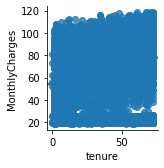

In [11]:
import seaborn as sns
sns.pairplot(df,x_vars=["tenure"],y_vars="MonthlyCharges",kind='reg')

#If no Relationship we can eleminate the variable if not required.

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


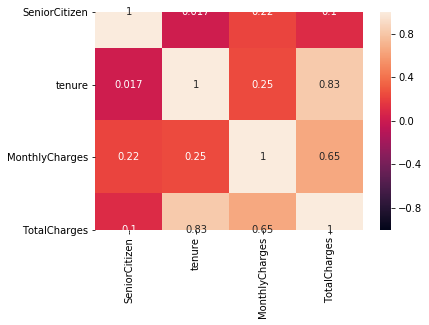

In [12]:

#create X and Y
X= df
Y= df['Churn']
#Multicorrelation 
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True)